### Quandl API data
Using the Quandl API to put together a custom dataset & join them together

In [1]:
import pandas as pd 
import Quandl
import time

In [2]:
#store the auth token in a separate file
auth_tok= open("auth.txt", "r").read()

Retrieve the datasets we are interested in within our desired time frame:

In [3]:
bdi = Quandl.get("LLOYDS/BDI", trim_start="2005-01-03", trim_end="2017-08-01", authtoken= auth_tok)

In [4]:
wti = Quandl.get("EIA/PET_RWTC_D", trim_start="2005-01-03", trim_end="2017-08-01", authtoken= auth_tok)

In [5]:
agris = Quandl.get("RICI/RICIA", trim_start="2005-01-03", trim_end="2017-08-01", authtoken= auth_tok)

In [6]:
metals = Quandl.get("RICI/RICIM", trim_start="2005-01-03", trim_end="2017-08-01", authtoken= auth_tok)

In [7]:
energy = Quandl.get("RICI/RICIM", trim_start="2005-01-03", trim_end="2017-08-01", authtoken= auth_tok)

In [8]:
libor = Quandl.get("FRED/USD9MTD156N", trim_start="2005-01-03", trim_end="2017-08-01", authtoken= auth_tok)

By default, Quandl uses the dates column as the index, but would like to include, so reset the index:

In [9]:
bdi = bdi.reset_index()

In [10]:
wti = wti.reset_index()

In [11]:
agris= agris.reset_index()

In [12]:
metals = metals.reset_index()

In [13]:
energy = energy.reset_index()

In [14]:
libor = libor.reset_index()

In [15]:
bdi= bdi.rename(columns = {'Index':'BDI_index'})

In [16]:
bdi.head()

,Date,BDI_index
0,2009-03-16,2058.0
1,2009-03-17,1974.0
2,2009-03-18,1861.0
3,2009-03-19,1795.0
4,2009-03-20,1782.0


In [17]:
wti= wti.rename(columns = {'Value':'WTI'})

In [18]:
agris.head()

,Date,Value
0,2005-01-03,998.79
1,2005-01-04,988.65
2,2005-01-05,994.26
3,2005-01-06,1002.09
4,2005-01-07,1004.33


In [19]:
agris= agris.rename(columns={'Value': 'Rogers_Agriculture'})

In [20]:
metals = metals.rename(columns={'Value': 'Rogers_Metals'})

In [21]:
energy= energy.rename(columns={'Value': 'Rogers_Energy'})

In [22]:
libor.head()

,DATE,VALUE
0,2005-01-04,2.9675
1,2005-01-05,3.0150
2,2005-01-06,3.0300
3,2005-01-07,3.0100
4,2005-01-10,3.0300


In [23]:
libor.columns=['Date', 'Libor_9m']

In [24]:
libor.columns

Index([u'Date', u'Libor_9m'], dtype='object')

### Merging the Datasets together:

In [38]:
#put dfs into a list:
dfs = [bdi, wti, agris, metals, energy, libor]

In [39]:
#function to perform a "left join"/merge of all the df's

def merge_dfs(ldf, rdf):
    return ldf.merge(rdf, how='left')

In [41]:
#use the reduce function to apply our merge_dfs function with our dfs list:

final_df = reduce(merge_dfs, dfs)

In [42]:
final_df.head()

,Date,BDI_index,WTI,Rogers_Agriculture,Rogers_Metals,Rogers_Energy,Libor_9m
0,2009-03-16,2058.0,47.33,853.79,1437.63,1437.63,2.04500
1,2009-03-17,1974.0,48.97,856.82,1438.90,1438.90,2.04250
2,2009-03-18,1861.0,48.12,849.37,1406.18,1406.18,2.01750
3,2009-03-19,1795.0,51.46,875.61,1495.69,1495.69,1.86000
4,2009-03-20,1782.0,51.55,877.46,1495.03,1495.03,1.86125


In [43]:
#Time-series:
import visualization as vis

In [45]:
final_df= final_df.rename(columns = {'Date':'timestamp'})

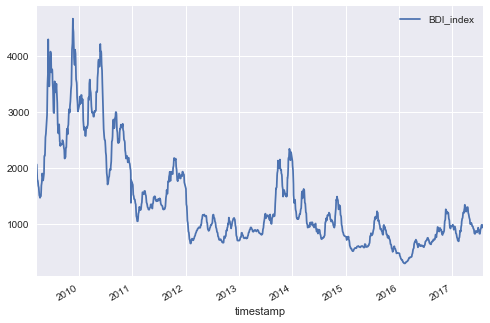

In [48]:
vis.timeseries_plot(final_df, val='BDI_index', by='day')

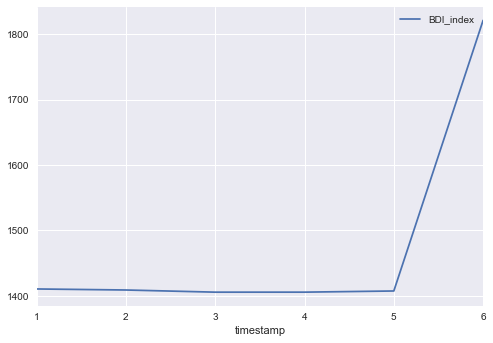

In [49]:
vis.timeseries_plot(final_df, val='BDI_index', by='weekday')

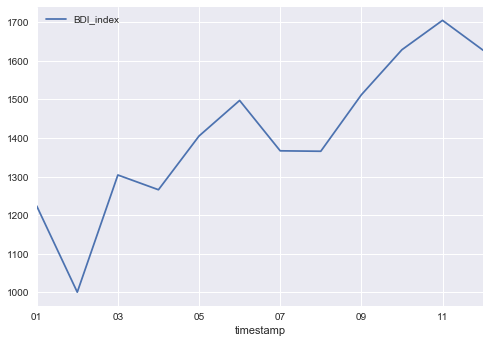

In [50]:
vis.timeseries_plot(final_df, val='BDI_index', by='month')

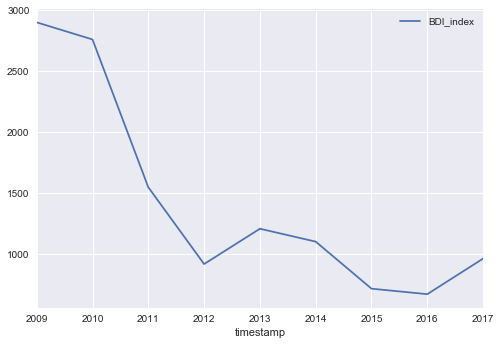

In [51]:
vis.timeseries_plot(final_df, val='BDI_index', by='year')

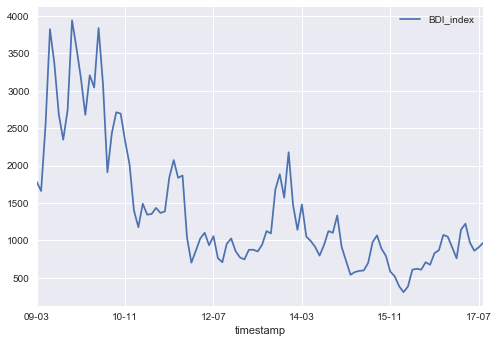

In [52]:
vis.timeseries_plot(final_df, val='BDI_index', by='%Y-%m')